Basica autoencoder

In [1]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import datetime
import keras

In [2]:
#DATA LOADING AND VISUALIZATION
(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)
     

(60000, 784)
(10000, 784)


In [3]:
encoding_dim=32 #change it if you want to change the hidden layers
input_img=Input(shape=(784,))

encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder= Model(input_img,decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


epochs=100
batch_size=100



In [5]:

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Epoch 1/100
600/600 [==============================] - 5s 6ms/step - loss: 0.0495 - accuracy: 0.0119 - val_loss: 0.0286 - val_accuracy: 0.0093
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0232 - accuracy: 0.0097 - val_loss: 0.0185 - val_accuracy: 0.0086
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0164 - accuracy: 0.0109 - val_loss: 0.0140 - val_accuracy: 0.0119
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0132 - accuracy: 0.0122 - val_loss: 0.0119 - val_accuracy: 0.0124
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0117 - accuracy: 0.0126 - val_loss: 0.0109 - val_accuracy: 0.0132
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0110 - accuracy: 0.0112 - val_loss: 0.0104 - val_accuracy: 0.0123
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0106 - accuracy: 0.0114 - val_loss: 0.0102 - val_accuracy: 0.0125

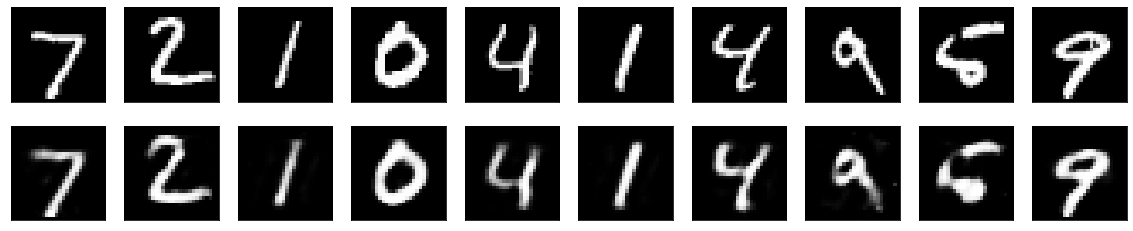

In [6]:
#This is to display the output that we have generated
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We see here that the decoder trained in our autoencoder learns grainy (lossy) versions of the original images.